___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

http://www.geography.hunter.cuny.edu/~jochen/gtech361/lectures/lecture11/concepts/hillshade.htm
https://rstudio-pubs-static.s3.amazonaws.com/160297_f7bcb8d140b74bd19b758eb328344908.html
- r studyo da cozulmus ornek ve domain bilgisi icin bakilmali.

#### *ii. Load Dataset*

In [4]:
data= pd.read_csv("treetypes.csv")
df=data.copy()

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [5]:
df.info

<bound method DataFrame.info of         Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2696     123     10                               212   
1            3269     110     19                               134   
2            3283     322     18                               346   
3            2847      89     31                               270   
4            3248      93     12                               507   
...           ...     ...    ...                               ...   
249995       2112     339     39                                49   
249996       2872      90     31                               251   
249997       2336      57      5                                 0   
249998       2563     181     10                                 0   
249999       3720     354     17                              1112   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   48              

In [6]:
display(df.info())
#tek kodla butun columu inceledin yeni gordum ben displayiii :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

None

In [7]:
df.describe().T 
# dikkat edilirse data get dumy yapilmis
#std ile mean birbinen bakiyoruz meane yakinsa std supheleniyoruz

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


In [8]:
df.isnull().sum()
# Datamizda non degerler yoktur.

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [9]:
df.nunique() # Kac tane farkli deger var onu gorduk

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

In [10]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [11]:
df.columns 

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

- soildtypeler ve wildernes get dummy sonucu 0,1 yapilmis categorik verilerdir
- cover type target valuedur
- digerleri de numeric columlardir.

In [12]:
df.shape

(250000, 55)

In [13]:
df.select_dtypes("number")

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,49,17,467,107,151,162,435,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
249996,2872,90,31,251,147,2027,248,172,27,508,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
249998,2563,181,10,0,0,1349,223,246,156,1007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [14]:
df.select_dtypes("number").shape 
# butun datamiz sayisal cunku get dummy yapilmis

(250000, 55)

In [15]:
df.Cover_Type.unique()
# bizim Target colmumuzun kac dgeri var , ciktimiz ne  olacak

array([6, 1, 7, 5, 2, 3, 4])

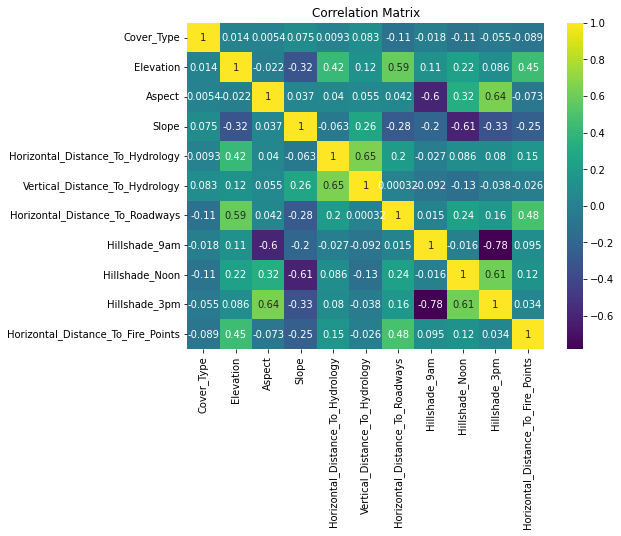

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Cover_Type",'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']].corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()
# get dummy disindaki numaric columlarin cor baktik.

- multi corelation gozukmuyor.

In [17]:

df["Cover_Type"].value_counts()
# targetmiz icindeki degeerlere bakarak balance mi diye kontrol ediyoruz

5    36079
1    35836
2    35780
6    35695
7    35690
4    35529
3    35391
Name: Cover_Type, dtype: int64

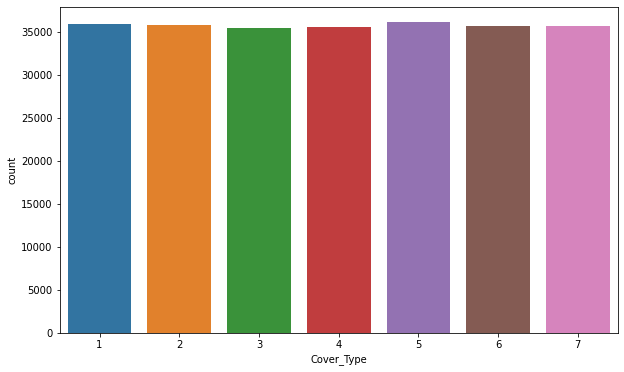

In [18]:
sns.countplot(x="Cover_Type", data = df);
# Datamiz balance durumunda hemen hepsinden ayni sayida var.


<Figure size 864x432 with 0 Axes>

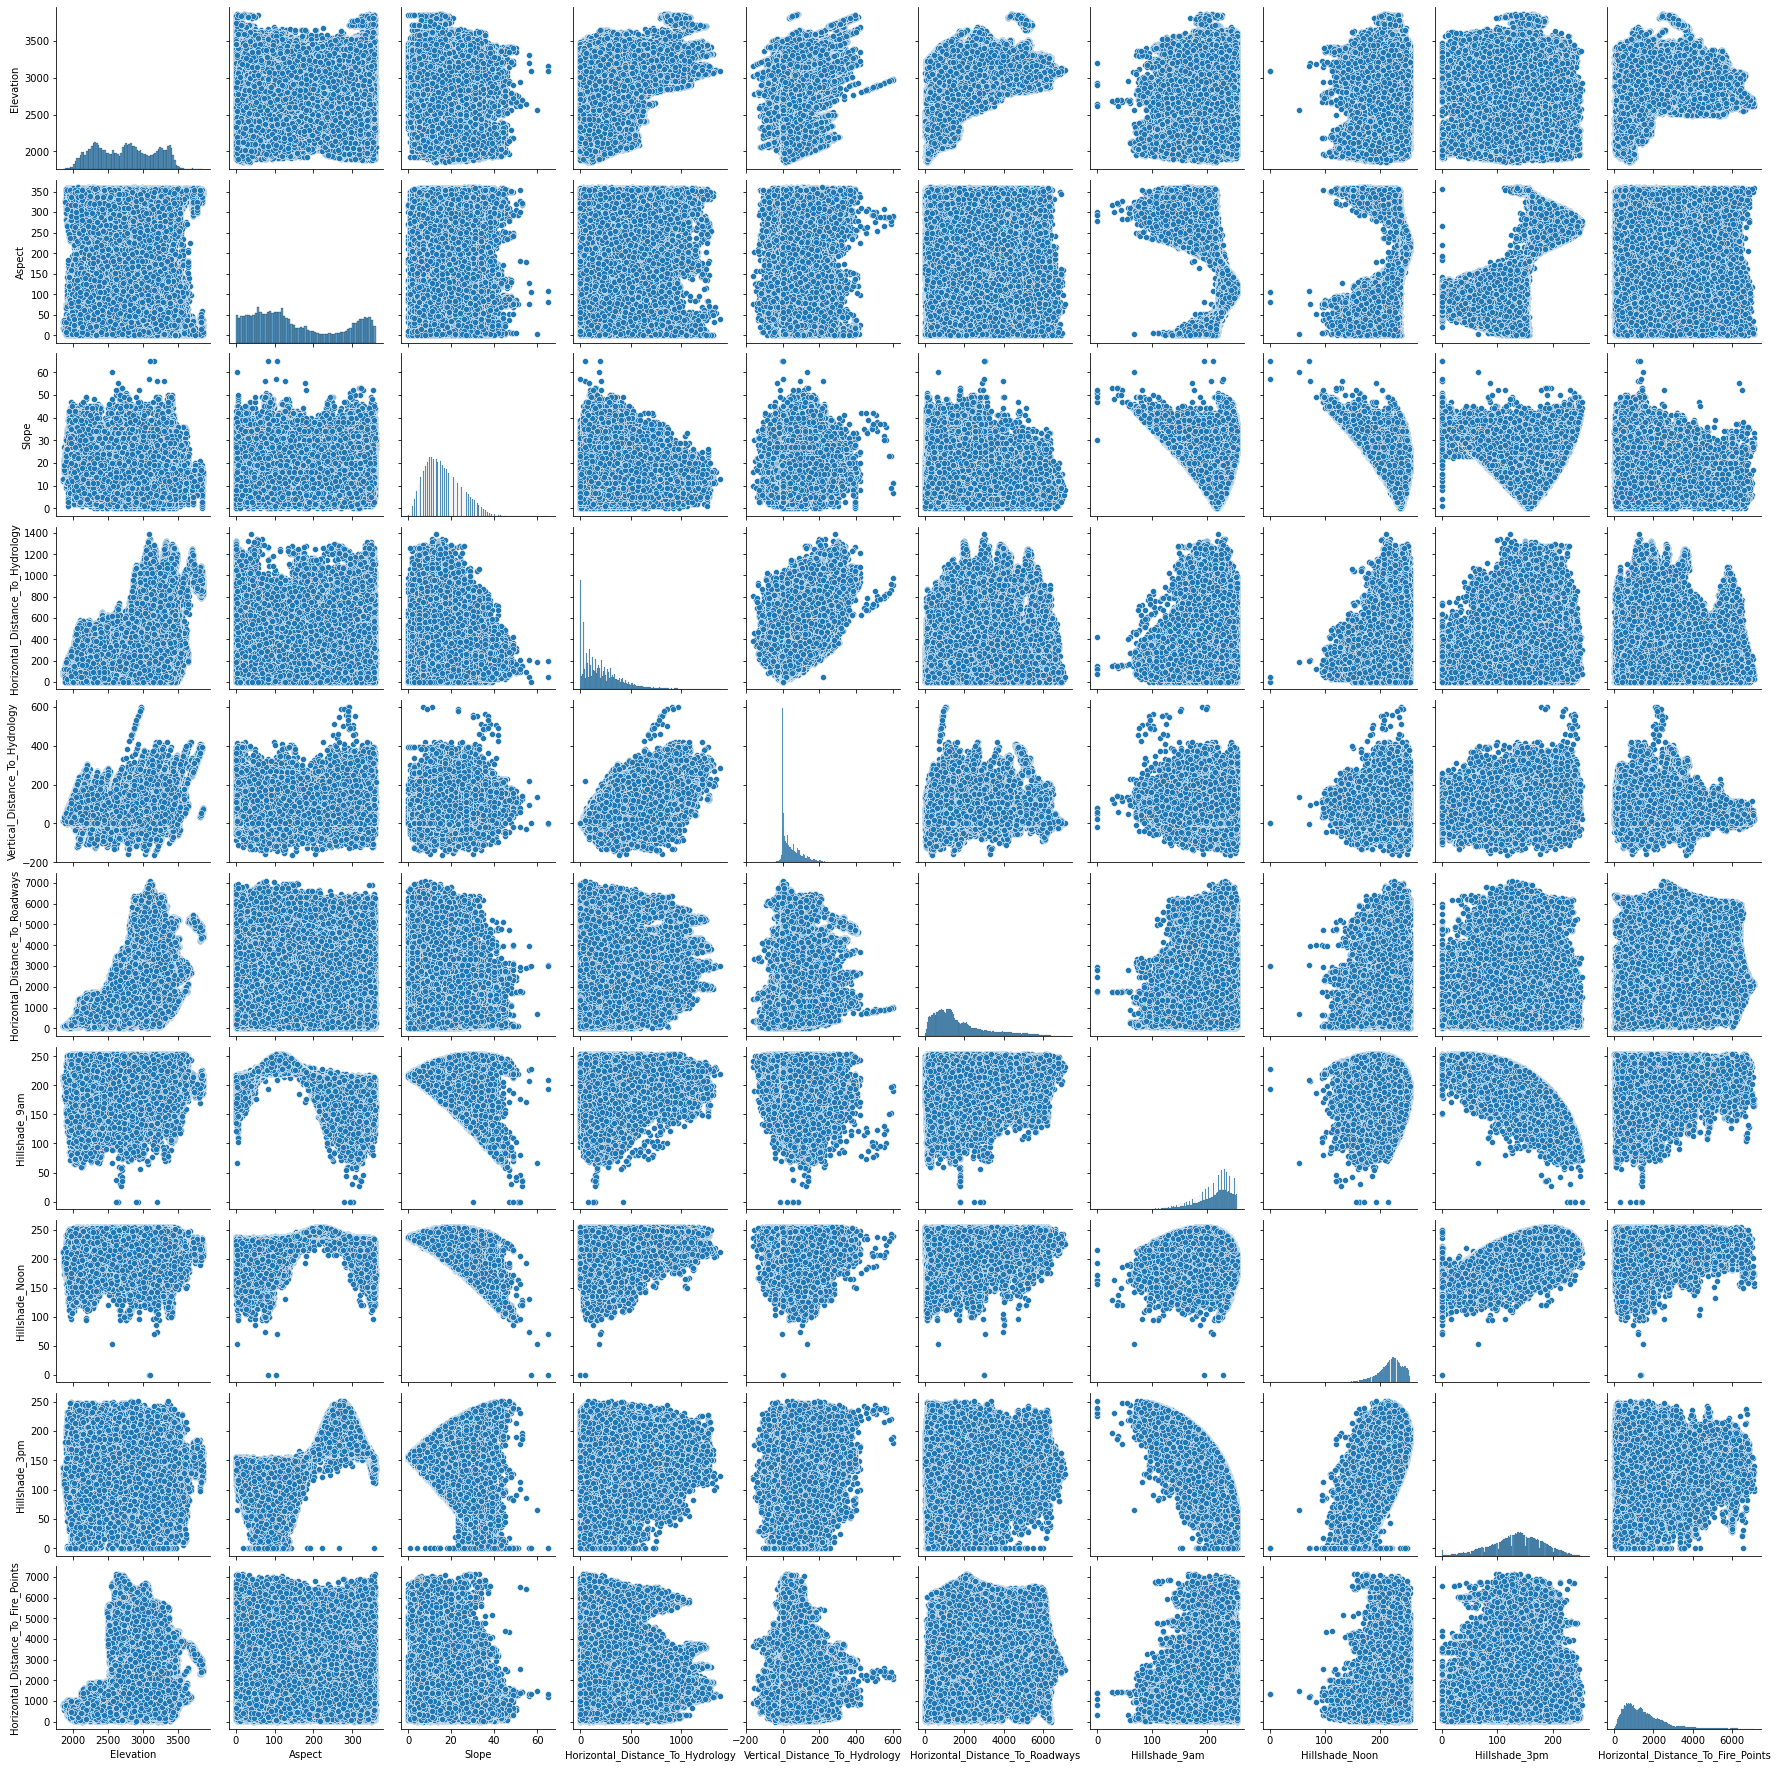

In [19]:
plt.figure(figsize=(12,6))
sns.pairplot(df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']],palette='Dark2')

In [20]:
for i in df.drop(columns ="Cover_Type"):
    print(f"corr between Cover_Type and {i:<12}:  {df['Cover_Type'].corr(df[i])}")
    #butun columlarin targeta gore cor aliyoruz

corr between Cover_Type and Elevation   :  0.014087485967437698
corr between Cover_Type and Aspect      :  0.0053890724976035816
corr between Cover_Type and Slope       :  0.07530380259832359
corr between Cover_Type and Horizontal_Distance_To_Hydrology:  0.009304675159198767
corr between Cover_Type and Vertical_Distance_To_Hydrology:  0.08288630415383401
corr between Cover_Type and Horizontal_Distance_To_Roadways:  -0.1080427914206283
corr between Cover_Type and Hillshade_9am:  -0.01780605425483093
corr between Cover_Type and Hillshade_Noon:  -0.10657811585713423
corr between Cover_Type and Hillshade_3pm:  -0.05502341089541998
corr between Cover_Type and Horizontal_Distance_To_Fire_Points:  -0.08873974078162596
corr between Cover_Type and Wilderness_Area_1:  -0.2342555173645254
corr between Cover_Type and Wilderness_Area_2:  0.0016288531601108415
corr between Cover_Type and Wilderness_Area_3:  0.12939136015645894
corr between Cover_Type and Wilderness_Area_4:  0.07620067056838631
corr 

***
***

In [21]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
# burda yazdigimiz sayilar max 100 row getir, max 100 column getir elmayi yormaaaa :) 

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [22]:
miss_val = []

[miss_val.append(column) for column in df.columns if any(df[column].isnull())]

print("Columns that have missing values :")

miss_val # missing value yook  rahatizz 

Columns that have missing values :


[]

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [23]:
df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']].describe().T 

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


- sayisal sutunlarin descibini alarak bunlarin icinde outlier var mi yok mu diye on izleme yapiyorum
- burda std ve mean birbine yakinsa outlier var gibi diyebiliriz 
- birde std cok yuksek ise outlier dan bahsebiliriz.
- q1 den min deger 1.5 kat kucukse aoutlier olabilir
- q3 den max deger 1.5 kat buyuk ise outlier olabilir.

Orion hoca yolladi ben calistiramadim ama ugrasmadim da :)

def outlier_report(df, cols, whisker=1.5):
    res = {}
    for col in cols:
        iqr = np.quantile(df[col],[.25,.75])[1] - np.quantile(df[col],[.25,.75])[0]
        lower_limit = np.quantile(df[col],[.25,.75])[0]- iqr*whisker 
        upper_limit = np.quantile(df[col],[.25,.75])[1]+iqr*whisker
        num = len([c for c in df[col].to_list() if (c<lower_limit or c>upper_limit)])
        if num > 0:res[col]={"lower_limit":lower_limit, "upper_limit":upper_limit, "iqr": iqr, "# of outliers":num}
    return pd.DataFrame(res).T

In [24]:
# outlier_report(df=df, cols=[2], whisker=1.5)

In [25]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

 - ben bunu cok begendim outlieari  tet tek teshi ediyor bu kod.

In [26]:
for column in df.columns:
    if outlier_function(df, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(df, column)[2], column))


There are 3 outliers in Slope
There are 732 outliers in Horizontal_Distance_To_Hydrology
There are 957 outliers in Vertical_Distance_To_Hydrology
There are 17 outliers in Horizontal_Distance_To_Roadways
There are 78 outliers in Hillshade_9am
There are 194 outliers in Hillshade_Noon
There are 2394 outliers in Horizontal_Distance_To_Fire_Points
There are 59575 outliers in Wilderness_Area_1
There are 8340 outliers in Wilderness_Area_2
There are 4586 outliers in Soil_Type_1
There are 8966 outliers in Soil_Type_2
There are 14594 outliers in Soil_Type_3
There are 11730 outliers in Soil_Type_4
There are 2259 outliers in Soil_Type_5
There are 9349 outliers in Soil_Type_6
There are 15 outliers in Soil_Type_7
There are 23 outliers in Soil_Type_8
There are 153 outliers in Soil_Type_9
There are 31533 outliers in Soil_Type_10
There are 5901 outliers in Soil_Type_11
There are 3934 outliers in Soil_Type_12
There are 8017 outliers in Soil_Type_13
There are 1577 outliers in Soil_Type_14
There are 1 out

- burda toprak tipi(soil), birde vahsi bolge(wildeners) kategorik veri oldugu icin bunlari binary zaten cevrilmis yani one hot encoding ya da dumy yapilmisti.bunlara islem yapilmayacak
- Horizontal_Distance_To_Hydrology
- Vertical_Distance_To_Hydrology
- Horizontal_Distance_To_Roadways
- Horizontal_Distance_To_Fire_Points bunlari yakindan incelemeye yukarkdaki outlier degerlerden dolayi karar verdik. 

- En fazla aykırı değere ve en geniş veri aralığına sahip olan Horizaontal_Distance_To_Fire_Points göz önüne alındığında, sadece o sütundan aykırı değerleri kaldıracağım.

# herbir sutun icin outlier incelemesi by boxplot

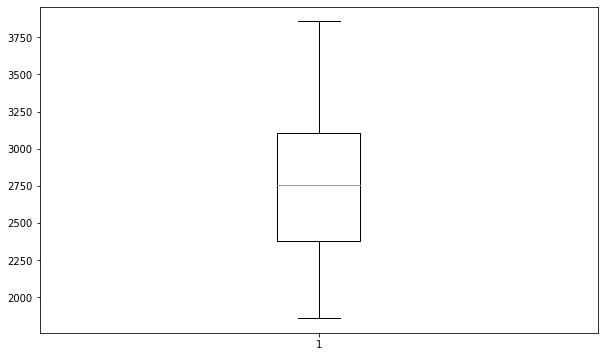

In [27]:
plt.boxplot("Elevation", data=df);

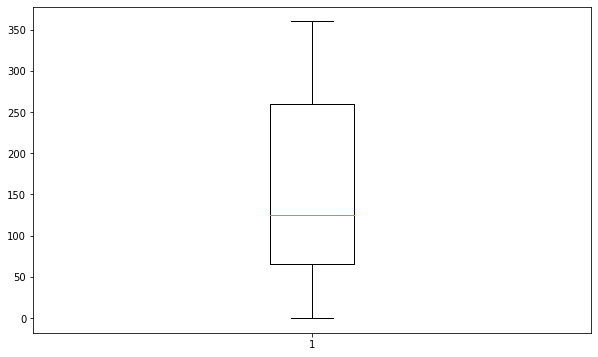

In [28]:
plt.boxplot("Aspect", data=df);

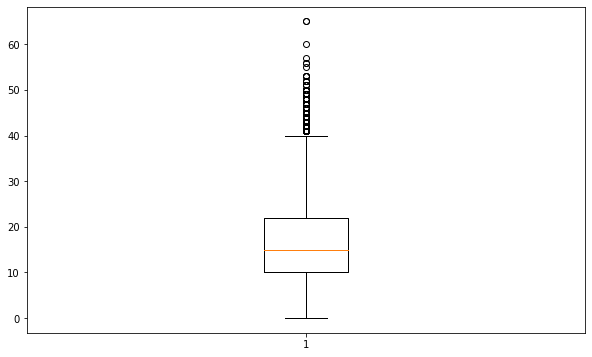

In [29]:
plt.boxplot("Slope", data=df);

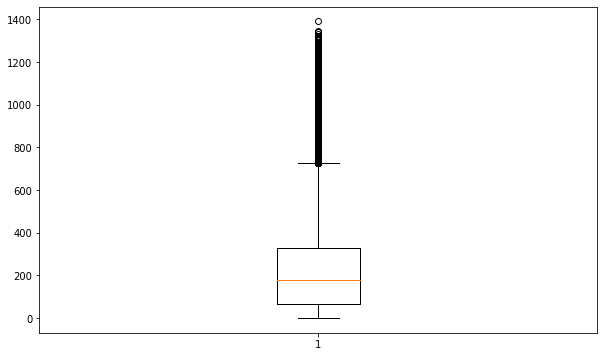

In [30]:
plt.boxplot("Horizontal_Distance_To_Hydrology", data=df);

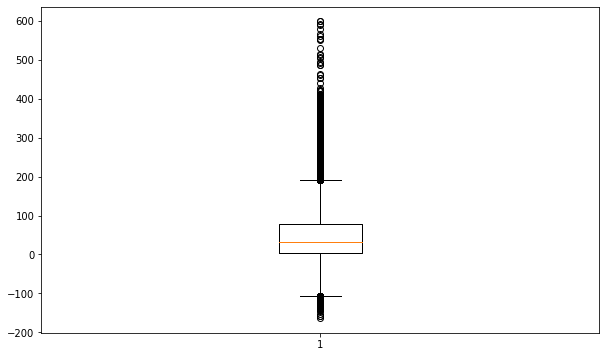

In [31]:
plt.boxplot("Vertical_Distance_To_Hydrology", data=df);

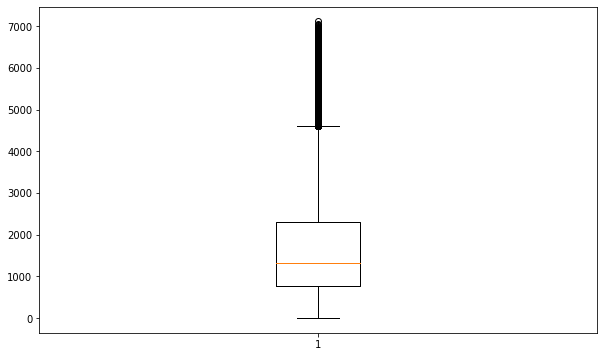

In [32]:
plt.boxplot("Horizontal_Distance_To_Roadways", data=df);

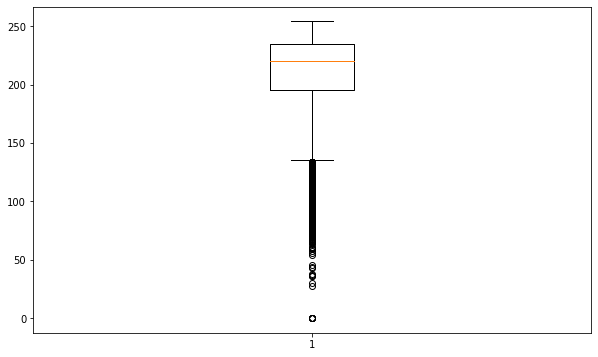

In [33]:
plt.boxplot("Hillshade_9am", data=df);

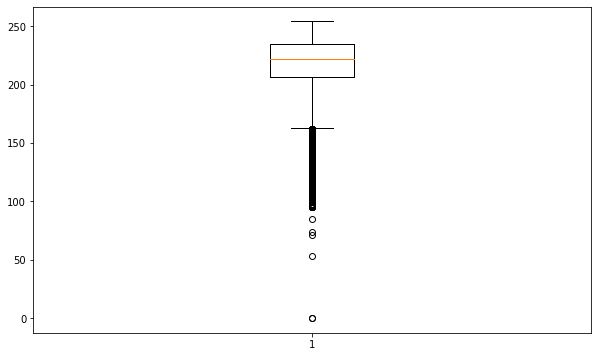

In [34]:
plt.boxplot("Hillshade_Noon", data=df);

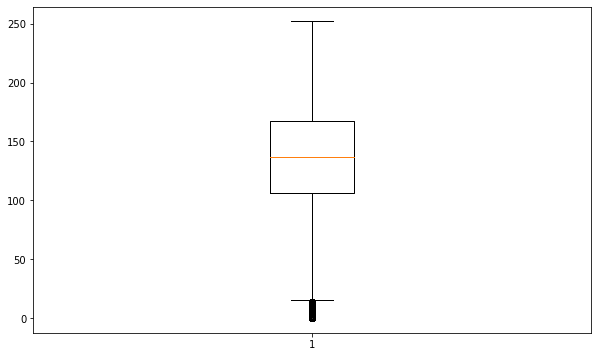

In [35]:
plt.boxplot("Hillshade_3pm", data=df);

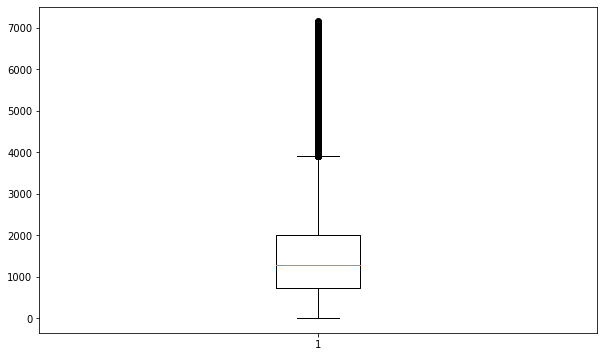

In [36]:
plt.boxplot("Horizontal_Distance_To_Fire_Points", data=df);

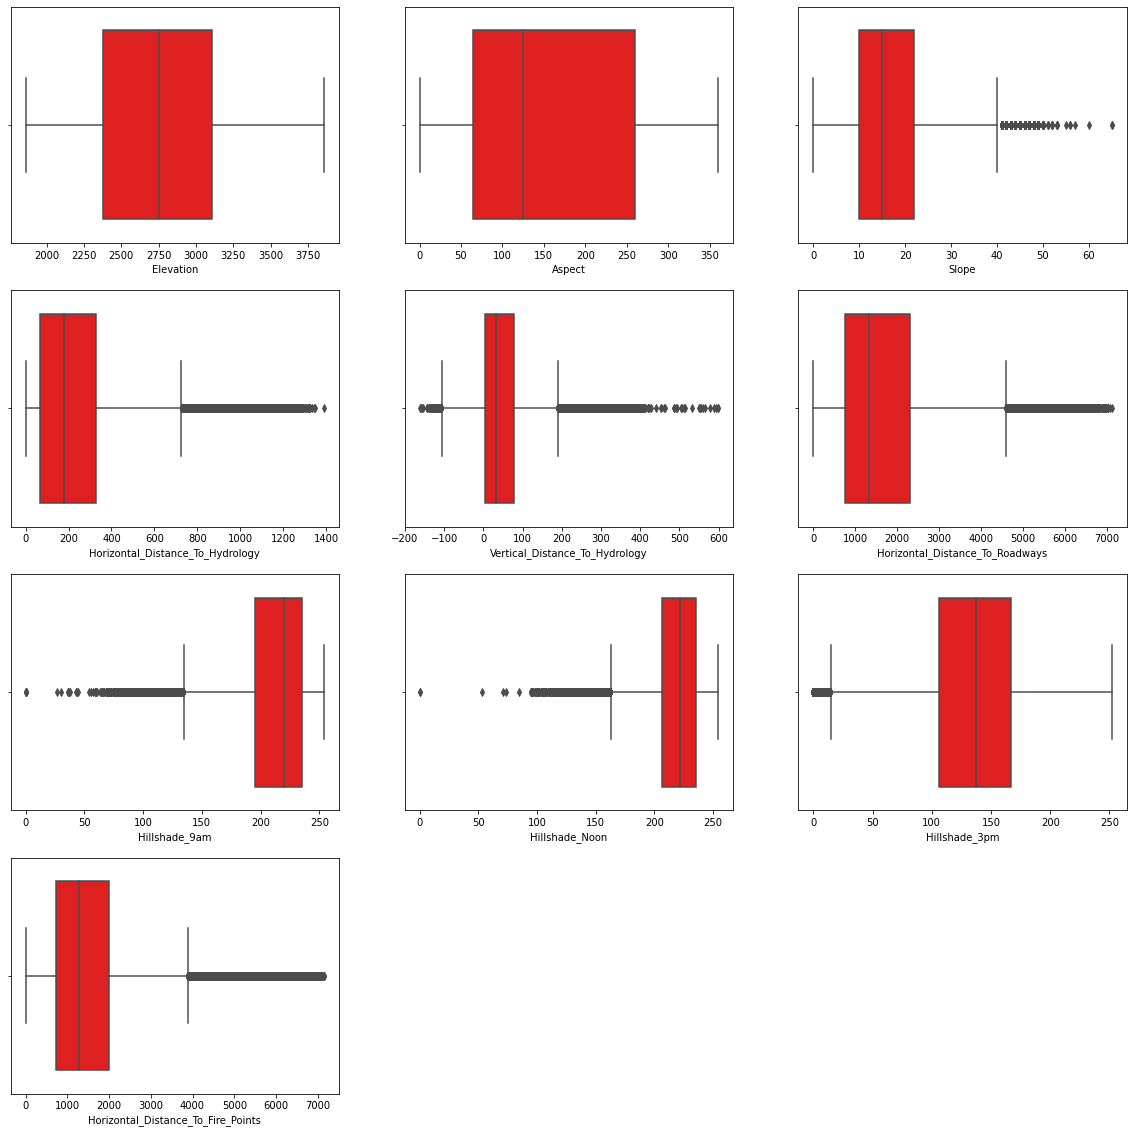

In [37]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=feature, data= df, whis=1.5, color="red")

- binary columlarimi check ettim bunlar sadece categorik olan dumy edilmis ici 1, 0 olan datamiz.

In [38]:
is_binary_columns = [column for column in df.columns if ("Wilderness" in column) | ("Soil" in column)]
pd.unique(df[is_binary_columns].values.ravel())
#ravel methodu ciktiyi araye ceviriyor yeni gordum :)

array([0, 1])

### Deal with Outliers

#### *ii. Drop Outliers*

- Odev yorumlamalari sonucunda iki sekilde yapmaya karar verdim 
1. aoutlier olanlarin  herbir sutun icin inceleyip dusurucem
2. dusurmeden direk feature engoneringe gecicem

In [39]:
df.shape

(250000, 55)

In [40]:
tree = df[(df['Horizontal_Distance_To_Fire_Points'] > outlier_function(df, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (df['Horizontal_Distance_To_Fire_Points'] < outlier_function(df, 'Horizontal_Distance_To_Fire_Points')[1])]
tree.shape 
# outlier degerleri cikardik burda ccolumu drop etmedik dikkattt

(247605, 55)

### Now, let's take a closer look at correlation of continuous columns.

In [41]:
tree_num=tree[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points',"Cover_Type"]]

In [42]:
#sayisal verilerin korelasyonu
for i in tree_num.drop(columns ="Cover_Type"):
    print(f"corr between Cover_Type and {i:<12}:  {tree_num['Cover_Type'].corr(tree_num[i])}")

corr between Cover_Type and Elevation   :  0.016815414405194233
corr between Cover_Type and Aspect      :  0.003964469329077894
corr between Cover_Type and Slope       :  0.07030495766391184
corr between Cover_Type and Horizontal_Distance_To_Hydrology:  0.011112265792606421
corr between Cover_Type and Vertical_Distance_To_Hydrology:  0.08160311230287871
corr between Cover_Type and Horizontal_Distance_To_Roadways:  -0.0986897216376515
corr between Cover_Type and Hillshade_9am:  -0.017351246418909567
corr between Cover_Type and Hillshade_Noon:  -0.10484120744230746
corr between Cover_Type and Hillshade_3pm:  -0.05359382770827772
corr between Cover_Type and Horizontal_Distance_To_Fire_Points:  -0.06521022594538566


***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [43]:
# hipotesini al yeni colum al
# average larini al bu ikisinin burda agaclarin su ve kara yoluna ort  yatay uzakligi hesaplamimizi istiyor.
# drop et 
# asagida denemeler yaptiklarimi tek sutunda topladim 

In [44]:
# h= df["Horizontal_Distance_To_Hydrology"].values**2

In [45]:
# v= df["Vertical_Distance_To_Hydrology"].values**2

In [46]:
# hypotenuse= (h+v)*(1/2)

In [47]:
# hypotenuse

In [48]:
# df.Elevation.mean()

In [49]:
# Horizantal Distances to Hydrology and Roadways

In [50]:
# hh= df["Horizontal_Distance_To_Hydrology"].values

In [51]:
# hr= df["Horizontal_Distance_To_Roadways"].values

In [52]:
# dist= (hh + hr) / 2

In [53]:
# dist


- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.
- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [54]:
tree.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

In [55]:
# add columns
tree['Euclidian_Distance_To_Hydrology'] = (tree['Horizontal_Distance_To_Hydrology']**2 + 
                                                           tree['Vertical_Distance_To_Hydrology']**2)**0.5 #1. istenen 

tree['Mean_Distance_Hydrology_Roadways'] = (tree['Horizontal_Distance_To_Hydrology'] + 
                                                            tree['Horizontal_Distance_To_Roadways'])/2  # 2. istenen

tree['Mean_Elevation_Vertical_Distance_Hydrology'] = (tree['Elevation'] + 
                                                                      tree['Vertical_Distance_To_Hydrology'])/2 # 3. istenen






In [56]:
tree.drop(["Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology"], axis=1, inplace=True)

In [57]:
tree.head(1).T

,0
Elevation,2696.000
Aspect,123.000
Slope,10.000
Horizontal_Distance_To_Roadways,2245.000
Hillshade_9am,237.000
Hillshade_Noon,231.000
Hillshade_3pm,123.000
Horizontal_Distance_To_Fire_Points,2113.000
Wilderness_Area_1,0.000
Wilderness_Area_2,0.000


In [58]:

tree.columns # drop islemi yaptiktan sonra tree dataframeni gectik 

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40',
       'Cover_Type', 'Euclidia

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [59]:
from sklearn.model_selection import train_test_split

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [60]:
X =tree.drop('Cover_Type',axis=1)

y = tree['Cover_Type']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
X_train.shape

(173323, 55)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [63]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [66]:
operations = [("scaler", StandardScaler()), ("LinearSVC", LinearSVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [67]:

pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[6904 1522    6    0  632   97 1364]
 [2723 4838  241    5 2052  479   71]
 [   0   34 5505 1557  642 2932    0]
 [   0    0  537 9663    0  429    0]
 [ 428 1361  874    0 7520  579    0]
 [   2  385 1809 1253 1048 6101    0]
 [1070   38   39    0   57    0 9485]]
              precision    recall  f1-score   support

           1       0.62      0.66      0.64     10525
           2       0.59      0.46      0.52     10409
           3       0.61      0.52      0.56     10670
           4       0.77      0.91      0.84     10629
           5       0.63      0.70      0.66     10762
           6       0.57      0.58      0.58     10598
           7       0.87      0.89      0.88     10689

    accuracy                           0.67     74282
   macro avg       0.67      0.67      0.67     74282
weighted avg       0.67      0.67      0.67     74282


Train_Set
[[16233  3564    28     0  1529   255  3204]
 [ 6254 11195   575    18  4680  1183   184]
 [    0    82 12594  3518 

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

- burda 3 kere decision tree model calistirdim.
- 1.pipeline farkettimki scalling yapiyor o yuzden onu kullanmadim.
- 2. farketmeden yukardaki scale edilmis egitim setlerini kullandimm 
- 3. scale edilmemis datayi aldim tree based model uyguladim.

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [69]:
operations = [("scaler", StandardScaler()), ("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [70]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 9038  1165     7     0    58     4   253]
 [ 1245  8612   145     1   258   121    27]
 [    2   110 10023   110    26   399     0]
 [    0     1    54 10531     0    43     0]
 [   21   136    23     0 10565    15     2]
 [    9    84   364    66    20 10055     0]
 [  137    18     0     0     2     0 10532]]
              precision    recall  f1-score   support

           1       0.86      0.86      0.86     10525
           2       0.85      0.83      0.84     10409
           3       0.94      0.94      0.94     10670
           4       0.98      0.99      0.99     10629
           5       0.97      0.98      0.97     10762
           6       0.95      0.95      0.95     10598
           7       0.97      0.99      0.98     10689

    accuracy                           0.93     74282
   macro avg       0.93      0.93      0.93     74282
weighted avg       0.93      0.93      0.93     74282


Train_Set
[[24813     0     0     0     0     0     0]
 [    0 24089     0   

- biz burda deneme icn trees based model scalling calismasini denemek istedik. niormalde if else yapisindan dolayi scalling grek degil.

In [71]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 9040  1165     7     0    58     4   251]
 [ 1242  8616   144     1   258   121    27]
 [    1   110 10023   108    27   401     0]
 [    0     1    53 10532     0    43     0]
 [   21   135    22     0 10566    17     1]
 [    7    82   366    66    20 10057     0]
 [  135    17     0     0     2     0 10535]]
              precision    recall  f1-score   support

           1       0.87      0.86      0.86     10525
           2       0.85      0.83      0.84     10409
           3       0.94      0.94      0.94     10670
           4       0.98      0.99      0.99     10629
           5       0.97      0.98      0.97     10762
           6       0.94      0.95      0.95     10598
           7       0.97      0.99      0.98     10689

    accuracy                           0.93     74282
   macro avg       0.93      0.93      0.93     74282
weighted avg       0.93      0.93      0.93     74282


Train_Set
[[24813     0     0     0     0     0     0]
 [    0 24089     0   

- farketmeden yin scale edilmis data kullandgimi icin accuracy ler 1 cikti  
- bunun uzerine scale edilmemis datayi almam gerektigni hatirladim canim kendim :) 

In [72]:
X =tree.drop('Cover_Type',axis=1)

y = tree['Cover_Type']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 9040  1165     7     0    58     4   251]
 [ 1242  8616   144     1   258   121    27]
 [    1   110 10023   108    27   401     0]
 [    0     1    53 10532     0    43     0]
 [   21   135    22     0 10566    17     1]
 [    7    82   366    66    20 10057     0]
 [  135    17     0     0     2     0 10535]]
              precision    recall  f1-score   support

           1       0.87      0.86      0.86     10525
           2       0.85      0.83      0.84     10409
           3       0.94      0.94      0.94     10670
           4       0.98      0.99      0.99     10629
           5       0.97      0.98      0.97     10762
           6       0.94      0.95      0.95     10598
           7       0.97      0.99      0.98     10689

    accuracy                           0.93     74282
   macro avg       0.93      0.93      0.93     74282
weighted avg       0.93      0.93      0.93     74282


Train_Set
[[24813     0     0     0     0     0     0]
 [    0 24089     0   

# cross validete for decision tree

In [75]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [76]:
model = DecisionTreeClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.928
test_precision_micro   0.928
test_recall_micro      0.928
test_f1_micro          0.928
dtype: float64

- butun datamis CV ile taradiktan sonra da cok az bir fark cikti.


In [77]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

,Feature Importance
Elevation,0.407
Horizontal_Distance_To_Fire_Points,0.100
Horizontal_Distance_To_Roadways,0.072
Euclidian_Distance_To_Hydrology,0.069
Mean_Distance_Hydrology_Roadways,0.049
Soil_Type_10,0.032
Mean_Elevation_Vertical_Distance_Hydrology,0.030
Hillshade_9am,0.029
Aspect,0.027
Hillshade_Noon,0.025


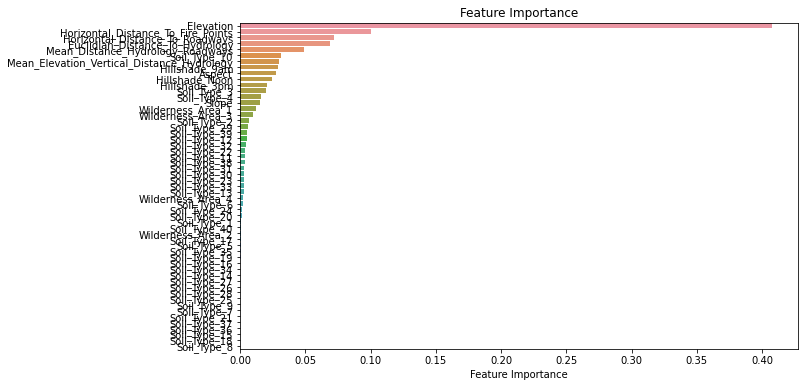

In [78]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

- Burda en onemli featurelar i secip onlarin etkisini gorduk.

In [79]:
imp_feat= dt_feature_imp.head(7)

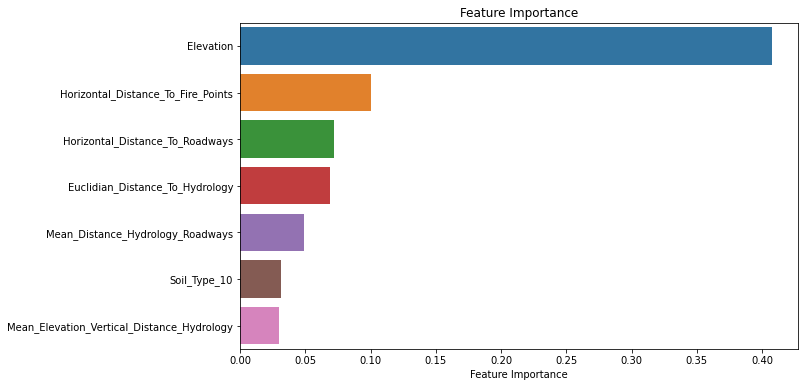

In [80]:
sns.barplot(x=imp_feat["Feature Importance"], y=imp_feat.index)
plt.title("Feature Importance")
plt.show()

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 9532   759     5     0    43    11   175]
 [  716  9235   126     0   176   132    24]
 [    0    10 10343    94    16   207     0]
 [    0     0     4 10624     0     1     0]
 [    1     7    10     0 10741     3     0]
 [    0     3   109    36     2 10448     0]
 [   27     1     0     0     1     0 10660]]
              precision    recall  f1-score   support

           1       0.93      0.91      0.92     10525
           2       0.92      0.89      0.90     10409
           3       0.98      0.97      0.97     10670
           4       0.99      1.00      0.99     10629
           5       0.98      1.00      0.99     10762
           6       0.97      0.99      0.98     10598
           7       0.98      1.00      0.99     10689

    accuracy                           0.96     74282
   macro avg       0.96      0.96      0.96     74282
weighted avg       0.96      0.96      0.96     74282


Train_Set
[[24813     0     0     0     0     0     0]
 [    0 24089     0   

## CV for Random Forest 

In [83]:
model = RandomForestClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.961
test_precision_micro   0.961
test_recall_micro      0.961
test_f1_micro          0.961
dtype: float64

- random forest daha guzel sonuc verdi.93 idi 996 yi gecti.

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [92]:
y_train = y_train.astype(str)

In [100]:
y_train.info

<bound method Series.info of 127028    5
184169    6
175052    4
128876    5
129130    2
         ..
121043    4
104717    2
133225    1
148308    4
123153    2
Name: Cover_Type, Length: 173323, dtype: int64>

In [101]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [110]:
y= le.fit_transform(y)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
from xgboost import XGBClassifier

In [113]:
xgb= XGBClassifier(random_state=42).fit(X_train, y_train)

In [114]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[ 8941  1130     5     0   116    12   321]
 [ 1471  8101   148     0   484   177    28]
 [    0    18  9667   134    54   797     0]
 [    0     0    20 10589     0    20     0]
 [    0    50    38     0 10657    17     0]
 [    1    14   397    54    31 10101     0]
 [   78     4     0     0     1     0 10606]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     10525
           1       0.87      0.78      0.82     10409
           2       0.94      0.91      0.92     10670
           3       0.98      1.00      0.99     10629
           4       0.94      0.99      0.96     10762
           5       0.91      0.95      0.93     10598
           6       0.97      0.99      0.98     10689

    accuracy                           0.92     74282
   macro avg       0.92      0.92      0.92     74282
weighted avg       0.92      0.92      0.92     74282


Train_Set
[[22116  2020     6     0   210    19   442]
 [ 2792 19869   234   

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

# F1 Score Comparison

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___